# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
** Mohammed Amro **
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Amro, Mohammed]

### Part (b): Course Number

[CSCI E-109A]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [3]:
# Read and load data from dataset_HW12.txt into pandas dataframe
df  = pd.read_csv('dataset_HW12.txt')

# print the size of the data frame
print 'Number of patients : ',df.shape[0]

# Print the head of df 
df.head(n=5)

Number of patients :  2300


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0.0,3,female
1,619711,13.787380,162.408932,0.0,15,female
2,619595,22.675580,130.227221,0.0,6,female
3,619990,13.500884,138.486428,0.0,17,male
4,619157,2.967811,144.105985,0.0,6,female


In [7]:


# Create new Data Frame contains only column 0 to 4 
df_cols_1_to_4 = df[range(1, 5)]    # this data frame will contains all values from df for columns 1 to 4
stats = pd.DataFrame(columns=df_cols_1_to_4.columns.values) # will create empty data frame with the same column name

#create a row called 'max' and store max values from the columns of important_columns
stats.loc['max'] = df_cols_1_to_4.max()

#create a row called 'min' and store min values from the columns of important_columns
stats.loc['min'] = df_cols_1_to_4.min()

#create a row called 'range' and store range of values from the columns of important_columns
stats.loc['range'] = df_cols_1_to_4.max() - df_cols_1_to_4.min()


stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.0
min,-22.591722,-56.388949,0.0,3.0
range,102.801470,420.610725,3.0,87.0


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [8]:
# Real Value columns are marker_1 , marker_2 , Patient_age

#choose columns 1, 2, 4 (ignoring columns 0, 3 and 4)

df_cols_1_2_4 = df[[1, 2, 4]] 

#Find the mean, median and standard deviation of the real-valued columns in the entire dataset.
# Note here the matching betwwen column name from df_cols_1_2_4 which will return three column only and stats which have
# 4 columns including subtype
#  From the Lab
#        stats.loc['mean'] = df_cols_1_2_4.mean()
#        stats.loc['median'] = df_cols_1_2_4.median()
#        stats.loc['std'] = df_cols_1_2_4.std()

# calculate the same with have to create new dataframe
stats.loc['mean'] = df[df.columns[[1,2,4]]].mean()
stats.loc['median'] = df[df.columns[[1,2,4]]].median()
stats.loc['std'] = df[df.columns[[1,2,4]]].std()

stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.000000
min,-22.591722,-56.388949,0.0,3.000000
range,102.801470,420.610725,3.0,87.000000
mean,31.970053,105.974247,NaN,38.868261
median,33.743705,105.179291,NaN,35.000000
std,18.096490,52.306201,NaN,27.211950


Now find the same set of descriptive statistics for each of the following subset of data:
children (ages 3 - 17)
adult males (ages 18 - 90)
adult females (ages 18 - 90)

In [16]:
# Create three new dataframe for each subset
children_data = df[df['patient_age']<18]
adult_males_data = df[(df['patient_age']>17) & (df['patient_gender']=='male')]
adult_female_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]

children_stats =  pd.DataFrame(columns=df_cols_1_to_4.columns.values) # will create empty data frame with the same column name
#Can use also 
#children_stats = c_stat = pd.DataFrame(columns= df[df.columns[[[1,2,3,4]]]].columns.values)

adult_males_stats =  pd.DataFrame(columns=df_cols_1_to_4.columns.values) # will create empty data frame with the same column name
adult_females_stats = pd.DataFrame(columns=df_cols_1_to_4.columns.values) # will create empty data frame with the same column name



In [11]:
children_stats.loc['max'] = children_data[range(1, 5)].max()
children_stats.loc['min'] = children_data[range(1, 5)].min()
children_stats.loc['range'] = children_data[range(1, 5)].max() - children_data[range(1, 5)].min()
children_stats.loc['mean'] = children_data[df.columns[[1,2,4]]].mean()
children_stats.loc['median'] = children_data[df.columns[[1,2,4]]].median()
children_stats.loc['std'] = children_data[df.columns[[1,2,4]]].std()
children_stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,171.429357,3.0,17.000000
min,-22.591722,70.538569,0.0,3.000000
range,102.801470,100.890788,3.0,14.000000
mean,26.267379,121.396907,NaN,10.106250
median,26.868357,121.799063,NaN,10.000000
std,24.972128,23.658433,NaN,4.307337


In [17]:
adult_males_stats.loc['max'] = adult_males_data[range(1, 5)].max()
adult_males_stats.loc['min'] = adult_males_data[range(1, 5)].min()
adult_males_stats.loc['range'] = adult_males_data[range(1, 5)].max() - adult_males_data[range(1, 5)].min()
adult_males_stats.loc['mean'] = adult_males_data[df.columns[[1,2,4]]].mean()
adult_males_stats.loc['median'] = adult_males_data[df.columns[[1,2,4]]].median()
adult_males_stats.loc['std'] = adult_males_data[df.columns[[1,2,4]]].std()
adult_males_stats

,marker_1,marker_2,subtype,patient_age
max,40.458624,364.221777,2.0,90.000000
min,1.860516,-56.388949,0.0,18.000000
range,38.598108,420.610725,2.0,72.000000
mean,24.678005,124.883059,NaN,53.744286
median,26.168875,110.893774,NaN,54.000000
std,6.956745,57.523807,NaN,21.295497


In [18]:
adult_females_stats.loc['max'] = adult_females_data[range(1, 5)].max()
adult_females_stats.loc['min'] = adult_females_data[range(1, 5)].min()
adult_females_stats.loc['range'] = adult_females_data[range(1, 5)].max() - adult_females_data[range(1, 5)].min()
adult_females_stats.loc['mean'] = adult_females_data[df.columns[[1,2,4]]].mean()
adult_females_stats.loc['median'] = adult_females_data[df.columns[[1,2,4]]].median()
adult_females_stats.loc['std'] = adult_females_data[df.columns[[1,2,4]]].std()


adult_females_stats



,marker_1,marker_2,subtype,patient_age
max,59.702106,190.047718,1.0,90.000000
min,28.364561,-43.386768,0.0,18.000000
range,31.337545,233.434486,1.0,72.000000
mean,44.053269,74.006378,NaN,54.613750
median,43.911490,73.086403,NaN,56.000000
std,7.141580,53.320292,NaN,21.094034


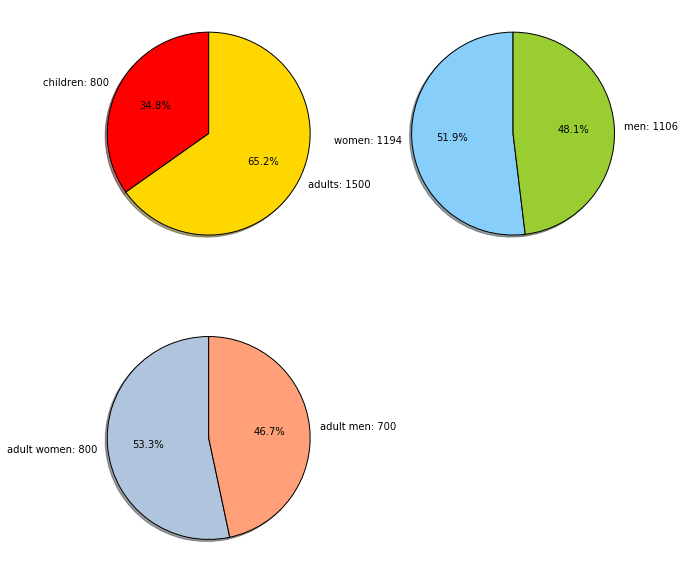

In [19]:
#children vs adults pie chart
no_of_children = children_data.shape[0]
no_of_adults =  adult_females_data.shape[0]+ adult_males_data.shape[0]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([no_of_children, no_of_adults], 
        labels=['children: ' + str(no_of_children), 'adults: ' + str(no_of_adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
no_of_women =  df[df['patient_gender'] == 'female'].shape[0]  #number of women
no_of_men =df.shape[0] - no_of_women # number of men 

ax2 = fig.add_subplot(222)
ax2.pie([no_of_women, no_of_men], 
        labels=['women: ' + str(no_of_women), 'men: ' + str(no_of_men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)


#adult women vs men pie chart
adult_women = adult_females_data.shape[0] 
adult_men = adult_males_data.shape[0]

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()


### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

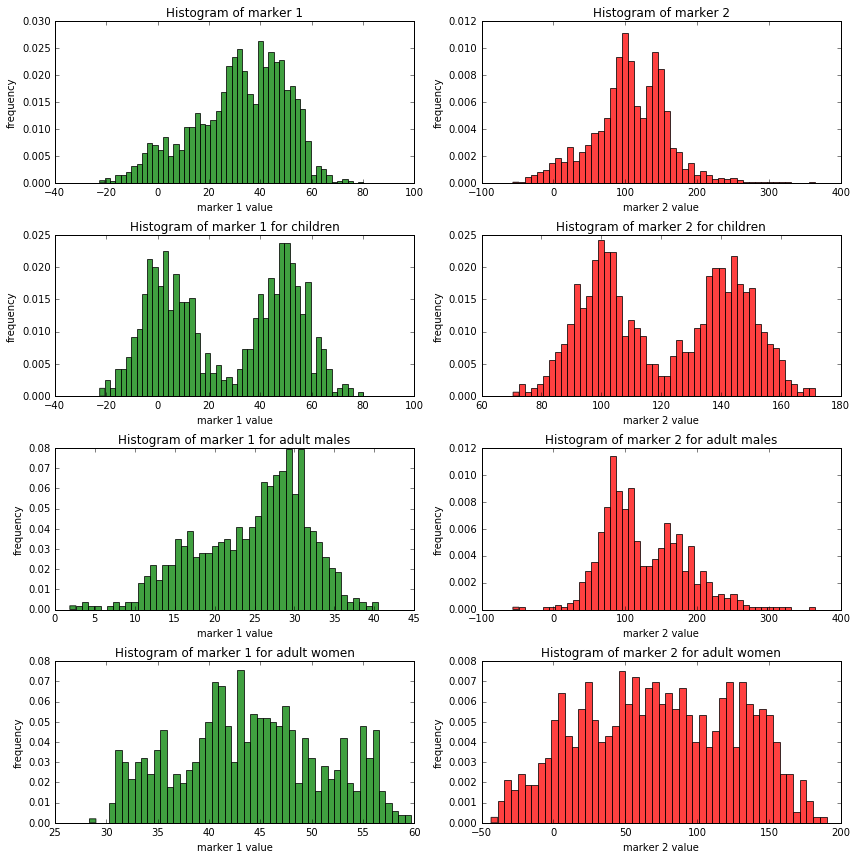

In [20]:


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 12))

ax1.hist(df['marker_1'], 
         50, 
         normed=1, 
         facecolor='green', 
         alpha=0.75)
    
ax1.set_title('Histogram of marker 1')
ax1.set_xlabel('marker 1 value')
ax1.set_ylabel('frequency')

ax2.hist(df['marker_2'], 
         50, 
         normed=1, 
         facecolor='red', 
         alpha=0.75)
    
ax2.set_title('Histogram of marker 2')
ax2.set_xlabel('marker 2 value')
ax2.set_ylabel('frequency')

# childern data
ax3.hist(children_data['marker_1'], 
         50, 
         normed=1, 
         facecolor='green', 
         alpha=0.75)
    
ax3.set_title('Histogram of marker 1 for children')
ax3.set_xlabel('marker 1 value')
ax3.set_ylabel('frequency')

ax4.hist(children_data['marker_2'], 
         50, 
         normed=1, 
         facecolor='red', 
         alpha=0.75)
    
ax4.set_title('Histogram of marker 2 for children')
ax4.set_xlabel('marker 2 value')
ax4.set_ylabel('frequency')


# Adult male data
ax5.hist(adult_males_data['marker_1'], 
         50, 
         normed=1, 
         facecolor='green', 
         alpha=0.75)
    
ax5.set_title('Histogram of marker 1 for adult males')
ax5.set_xlabel('marker 1 value')
ax5.set_ylabel('frequency')

ax6.hist(adult_males_data['marker_2'], 
         50, 
         normed=1, 
         facecolor='red', 
         alpha=0.75)
    
ax6.set_title('Histogram of marker 2 for adult males')
ax6.set_xlabel('marker 2 value')
ax6.set_ylabel('frequency')


# Adult Women data
ax7.hist(adult_females_data['marker_1'], 
         50, 
         normed=1, 
         facecolor='green', 
         alpha=0.75)
    
ax7.set_title('Histogram of marker 1 for adult women')
ax7.set_xlabel('marker 1 value')
ax7.set_ylabel('frequency')

ax8.hist(adult_females_data['marker_2'], 
         50, 
         normed=1, 
         facecolor='red', 
         alpha=0.75)
    
ax8.set_title('Histogram of marker 2 for adult women')
ax8.set_xlabel('marker 2 value')
ax8.set_ylabel('frequency')

plt.tight_layout()
plt.show()

**Solution:**

plot both markers in a scatter plot, color each point according to disease subtype

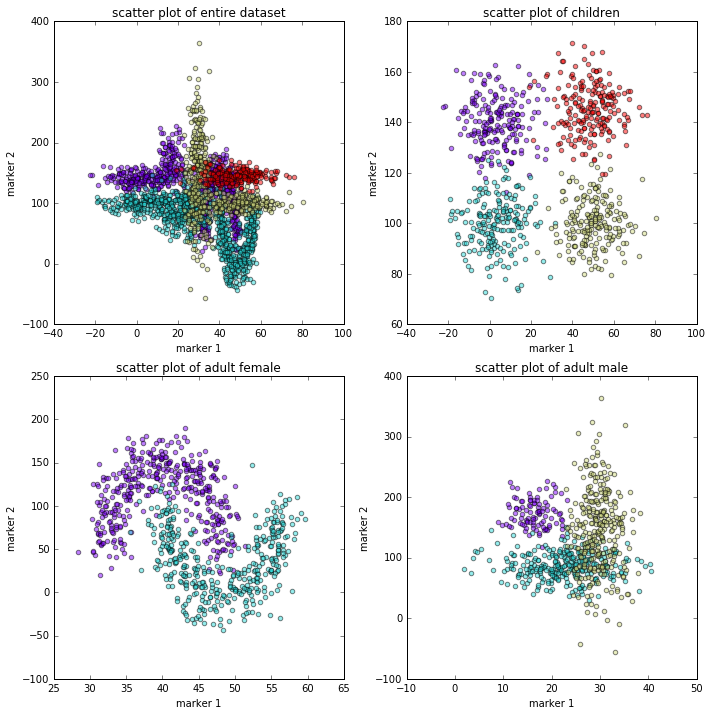

In [22]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
   
    #get a color map
    c_map = plt.get_cmap('rainbow') 
   
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'], 
                     data[data['subtype'] == group]['marker_2'], 
                     c=color, 
                     alpha = 0.5)

    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)  
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_females_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_males_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 

plt.tight_layout()
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

** 1- histograms Interpretation **

    a. multiple mode in the histograms of (both Marker 1 and Marker 2) for the entire data set
    b. bimodel Histogram for marker 1 and marker 2 for children.
    c. histogram for marker 2 for adult men look like bimodal.
    d. histogram for marker 1 for adult men look like unimodal.
    e. histogram for marker 1 and 2 for adult women look like unimodal.
      

** 2- Scatter Plot Interpretation **

    a- the fout disease subtype only exists in children data.
    b- only two subtype exist in adult women data.
    c. only three subtype exist in adult men data.
    d. scatter polt for whole data didn't provide subgroup separation.
    e.scatter polt for childer is clustered by disease subtype.
    f.scatter plot for Adult female  : even the plot didn't show clusterling but there is a pattern in the graph showing storge correaltion but not linear.

** 3- comparsion of Visualizations and Stats **
     
     a. The modes in the histogram correspond to clustering of the biometric data by disease subtype. b. Using the histogram alone, we cannot necessarily deduce the distribution of the scatter plots. c. Using the histograms alone, we cannot deduce clustering by disease subtypes. The modes in the histogram tell us where the data is concentrated along which axis, but they cannot tell us which disease subtypes exist in each mode. d. The stats we calculated for the entire dataset also give no indication of the patterns we see in the scatter plots.
     
** 4- Conclusion  **

    a. if we looked at the data one demographic group at a time, then, for all demographic groups, it looks like biometric data cluster by disease type. 
    
    b. the clusters are well separated for children, the separation is along both the Marker 1 and Marker 2 axes. The separation is not so clear for the other two groups.    

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

** Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1. **

As per scattor plot for marker 1 and marker 2 for children data there is stronge evidance that there is a clustering and grouping based in subtype.

** Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (Hint: think about the effect of the number of patients in each disease subtype, confidence level etc). **

the presentage of correct classification is show how valid is my classifer based on of number of patients for each disease in the training data set and as long as this number increase with the correct classification my  the confidence level will increase which can be used as a good indication for my classifier before apply it to the testing data set.

** In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. **

In [24]:
# create data frame for each diabetic subtypefor childern data
df_child_subtype_0 = children_data[children_data['subtype'] == 0]
df_child_subtype_1 = children_data[children_data['subtype'] == 1]
df_child_subtype_2 = children_data[children_data['subtype'] == 2]
df_child_subtype_3 = children_data[children_data['subtype'] == 3]

# Create new data frame biometric_mean which will contains the mean for marker 1 and marker 2 for each subtype
# as additional information we will store also the mean for marker 1 and marker 2 for whole data set
biometric_mean = pd.DataFrame(columns=df[range(1,3)].columns.values)
biometric_mean.loc['All']= children_data.mean()
biometric_mean.loc['Subtype_0']= df_child_subtype_0.mean()
biometric_mean.loc['Subtype_1']= df_child_subtype_1.mean()
biometric_mean.loc['Subtype_2']= df_child_subtype_2.mean()
biometric_mean.loc['Subtype_3']= df_child_subtype_3.mean()

biometric_mean

,marker_1,marker_2
All,26.267379,121.396907
Subtype_0,3.279820,140.149140
Subtype_1,3.325403,99.704377
Subtype_2,49.942425,100.196777
Subtype_3,48.521868,145.537334


### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

Randomly split the child patient data into two sets: training (70%) and testing (30%).

In [49]:
# define a split_data funcation  that takes one data set and return train and test data test 
def split_data(full_data_frame):
  # we will fix the split presentage at 70 % 

 '''
    # use dp.sample and dp.drop to split the data fram into two subset 
       #training_data_set=full_data_frame.sample(frac=0.7,random_state=200)
       #testing_data_set=full_data_frame.drop(training_data_set.index)
 '''

 msk = np.random.rand(len(full_data_frame)) < 0.7
 training_data_set = full_data_frame[msk]
 testing_data_set = full_data_frame[~msk]   
 return training_data_set, testing_data_set


In [81]:

# Get the total number of the children data
print 'Total number of childern                  : ',children_data.shape[0] 

# Randomly split the child patient data into two sets: training (70%) and testing (30%).
children_training_data, children_testing_data = split_data(children_data)
print 'Total number of childern in Training data : ', children_training_data.shape[0]
print 'Total number of childern in Testing data   : ',children_testing_data.shape[0]

children_training_data.head(5)

Total number of childern                  :  800
Total number of childern in Training data :  577
Total number of childern in Testing data   :  223


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0.0,3,female
1,619711,13.787380,162.408932,0.0,15,female
3,619990,13.500884,138.486428,0.0,17,male
4,619157,2.967811,144.105985,0.0,6,female
5,619320,5.440436,154.542735,0.0,9,female


- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)

In [82]:
from math import sqrt
pd.options.mode.chained_assignment = None  # default='warn'

def classify (train, test):
 # divide the train data set into four subset , one for each subtype
 train_subtype_0 = train[train['subtype'] == 0]
 train_subtype_1 = train[train['subtype'] == 1]
 train_subtype_2 = train[train['subtype'] == 2]
 train_subtype_3 = train[train['subtype'] == 3]

 # calculate the mean for each subtype and store into into train|_mean data frame
    
 train_mean = pd.DataFrame(columns=df[range(1,3)].columns.values)
 train_mean.loc['subtype_0']= train_subtype_0.mean()
 train_mean.loc['subtype_1']= train_subtype_1.mean()
 train_mean.loc['subtype_2']= train_subtype_2.mean()
 train_mean.loc['subtype_3']= train_subtype_3.mean()


 # Add new column in the test data frame to have the  classified_subtype
 test['classified_subtype'] = pd.Series() 
 # loop for each row in the test data set
    
 for index, row in test.iterrows():
  
   # calculate the euclidean distance between the current row (marker1,marker2) and each mean for each subset
   euclidean_distance_0 = sqrt((train_mean.loc['subtype_0'].marker_1 - row.marker_1 )**2 + (train_mean.loc['subtype_0'].marker_2 - row.marker_2)**2)
   euclidean_distance_1 = sqrt((train_mean.loc['subtype_1'].marker_1 - row.marker_1 )**2 + (train_mean.loc['subtype_1'].marker_2 - row.marker_2)**2)
   euclidean_distance_2 = sqrt((train_mean.loc['subtype_2'].marker_1 - row.marker_1 )**2 + (train_mean.loc['subtype_2'].marker_2 - row.marker_2)**2)
   euclidean_distance_3 = sqrt((train_mean.loc['subtype_3'].marker_1 - row.marker_1 )**2 + (train_mean.loc['subtype_3'].marker_2 - row.marker_2)**2)
   
   # get the nearest mean 
   euclidean_distance = min (euclidean_distance_0,euclidean_distance_1,euclidean_distance_2,euclidean_distance_3)
   
   # set the classify_subtype according to tje min euclidean distance
   if euclidean_distance == euclidean_distance_0:
       classify_subtype = 0
   elif euclidean_distance == euclidean_distance_1:
       classify_subtype = 1
   elif euclidean_distance == euclidean_distance_2 :
          classify_subtype = 2
   elif euclidean_distance == euclidean_distance_3 :
         classify_subtype = 3
        
   # fill the classified_subtype with the calculated subtype
   test.at[index,'classified_subtype'] = classify_subtype 
   
 return test

Write a function, evaluate, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.


    


In [86]:
def evaluate(subtype_org, subtype_est):

 result =  (subtype_org == subtype_est)
 result.value_counts()  #  /len(result)
 # Count total number of true in pandas series
 #result.sum()
 # Return the percentage of true
 print 'percentage of new patients who are correctly classified is : ' , result.sum() * 100 / len(result)
 return result.sum() * 100 / len(result) 


- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

In [87]:
children_testing_data = classify (children_training_data , children_testing_data)


In [88]:
evaluate (children_testing_data['subtype'] , children_testing_data['classified_subtype'])


percentage of new patients who are correctly classified is :  96


96

### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [124]:
# Get the total number of the Adult_female
print 'Total number of adult female                  : ',adult_females_data.shape[0] 

adult_female_training_data, adult_female_testing_data = split_data(adult_females_data)
print 'Total number of adult female in Training data : ', adult_female_training_data.shape[0]
print 'Total number of adult female in Testing data   : ',adult_female_testing_data.shape[0]
adult_female_testing_data = classify (adult_female_training_data , adult_female_testing_data)
evaluate (adult_female_testing_data['subtype'] , adult_female_testing_data['classified_subtype'])

Total number of adult female                  :  800
Total number of adult female in Training data :  546
Total number of adult female in Testing data   :  254
percentage of new patients who are correctly classified is :  81


81

In [120]:
# Get the total number of the Adult_males
print 'Total number of adult male                 : ',adult_males_data.shape[0] 

adult_male_training_data, adult_male_testing_data = split_data(adult_males_data)
print 'Total number of adult female in Training data : ', adult_male_training_data.shape[0]
print 'Total number of adult female in Testing data   : ',adult_male_testing_data.shape[0]
adult_male_testing_data = classify (adult_male_training_data , adult_male_testing_data)
evaluate (adult_male_testing_data['subtype'] , adult_male_testing_data['classified_subtype'])

Total number of adult male                 :  700
Total number of adult female in Training data :  488
Total number of adult female in Testing data   :  212
percentage of new patients who are correctly classified is :  64


64

** Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the evaluate function to support your explanation)?
Explain why our method of classifying disease subtypes is or is not valid for adult data. **

1- this mehtod of classifing is not the optimal method for adult .

2- The reason can be clear form the scatter plot between marker_1 and marker_2 : there is a stronge separtaion for each subtype inclidren  while it is not the case for adult . 

3- from the scatter polt it is clear there are three subtype only in adult data while this classifier depend on the whole four subtypes.

4- the same for women data , there are only two subtypes while this classifier depend on the whole four subtypes. 

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

1- Using this mehtod which this KNN with K =1 can be ressonable as per scatter plot 1 which show that there is overlap between the four subtype in the  whole data.

2- this method will ignore the subgroup by patient age and gender  which will give bad estimatation meanly for childern data becuase as per visualization of childern data there is a stronge separation between each subgroup.

3- this method will be mush slower that the previous one as we have to compare which new patient with the whole training subset.


### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [111]:
from math import sqrt
def classify2 (train, test):

 
 # Add new column in the train data frame to have the  euclidean_distance
 # this column will hold the euclidean distance between current record in train data set and current patient in test data set
 train['euclidean_distance'] = pd.Series() 

 # Add new column in the test data frame to have the  classified_subtype
 test['classified_subtype'] = pd.Series() 
 for index, row in test.iterrows():
    # loop to calcluate the eiclidean distance for current patient in test data set with whole training dataset
    for index_train , row_train in train.iterrows():
        # calcluate the eiclidean distance for current patient in test data set with current training dataset row
        train.at[index_train,'euclidean_distance'] = sqrt((row_train.marker_1 )**2 + (row_train.marker_2 - row.marker_2)**2)
 
    # fill the classified_subtype with the subtype of the traning row have min euclidean_distance
    test.at[index,'classified_subtype'] = train.loc[train['euclidean_distance'].idxmin()].subtype

 return test

In [112]:
# split the child patient data into two sets: training (70%) and testing (30%).
children_training_data2, children_testing_data2 = split_data(children_data)
print 'Total number of childern in Training data : ', children_training_data2.shape[0]
print 'Total number of childern in Testing data   : ',children_testing_data2.shape[0]
 # apply new classify method for childern data 
children_testing_data2 = classify2 (children_training_data2 , children_testing_data2)
evaluate (children_testing_data2['subtype'] , children_testing_data2['classified_subtype'])


Total number of childern in Training data :  563
Total number of childern in Testing data   :  237
percentage of new patients who are correctly classified is :  52


52

In [113]:
# split the adult women patient data into two sets: training (70%) and testing (30%).
adult_female_training_data2, adult_female_testing_data2 = split_data(adult_females_data)
print 'Total number of adult female in Training data : ', adult_female_training_data2.shape[0]
print 'Total number of adult female in Testing data   : ',adult_female_testing_data2.shape[0]
 # apply new classify method for adult women data 
adult_female_testing_data2 = classify2(adult_female_training_data2 , adult_female_testing_data2)
evaluate (adult_female_testing_data2['subtype'] , adult_female_testing_data2['classified_subtype'])

Total number of adult female in Training data :  576
Total number of adult female in Testing data   :  224
percentage of new patients who are correctly classified is :  57


57

In [121]:
# split the adulr men patient data into two sets: training (70%) and testing (30%).

adult_male_training_data2, adult_male_testing_data2 = split_data(adult_males_data)
print 'Total number of adult female in Training data : ', adult_male_training_data2.shape[0]
print 'Total number of adult female in Testing data   : ',adult_male_testing_data2.shape[0]
 # apply new classify method for adult men data 
adult_male_testing_data2 = classify2(adult_male_training_data2 , adult_male_testing_data2)
evaluate (adult_male_testing_data2['subtype'] , adult_male_testing_data2['classified_subtype'])

Total number of adult female in Training data :  480
Total number of adult female in Testing data   :  220
percentage of new patients who are correctly classified is :  58


58

### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

Preformance  : classifier one is much better and faster then classifier two , as classifier one is only compare four mean values which each new patient while the classifier two compare the whole traning set with each patient

better estimation  : classifier one is better in terms of good estimation
specially for childern data as it   
** Child patient data ** : classifer one use the subgroup information according to age and gener into considration. and as is data in providing a good and clear subgroup for each subtype the estimation using classifier one will be more accurate than calssifier two

**Male Data** : both classifier provide similar estimation betwen 60% and 65% and this is becuase this is an overlap between one disease subtype in male data and anthoer two subtypes  with the absence of the fourth subtype.

**Women Data** : classifier one provide bettwet estimate arround 80% becuase the women data already subdivided into separte subgroup ,  and the missing 20% in this estimation come form the classifier one consider the whole 4 subtype in only the women two subtype.




---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

** Brief summary **

1- the data set discript in summary the voting detials in terms on vote and register.

2- the data is devided based on age from 18 to above 84

3- the data conatins summary and details information for gender group ( both , male , female)

4- there is a small difference between some summmary number and it is details.



In [464]:
# Read and load data from dataset_HW12.txt into pandas dataframe
vote_data  = pd.read_excel('table01.xls', skiprows=2 ,skip_footer=5, header = [1,2,3])
# remove null rows
vote_data.dropna()

# display first 5 rows for the data set
vote_data.head(n=5)


Sex and Age                Total Population               US Citizen  \
                         Unnamed: 0_level_1 Total Citizen Population   
                         Unnamed: 0_level_2       Unnamed: 1_level_2   
Both sexes                                                             
NaN                                     NaN                      NaN   
.Total 18 years and over           239874.0                 219941.0   
..18 to 24 years                    29658.0                  27539.0   
..25 to 34 years                    42321.0                  37061.0   
..35 to 44 years                    39565.0                  34334.0   

Sex and Age                                                                   \
                         Reported registered         Reported not registered   
                                      Number Percent                  Number   
Both sexes                                                                     
NaN                                      NaN     NaN                     NaN   
.Total 18 years and over            142166.0    64.6                 41101.0   
..18 to 24 years                     11610.0    42.2                  9390.0   
..25 to 34 years                     20914.0    56.4                  9351.0   
..35 to 44 years                     22273.0    64.9                  6287.0   

Sex and Age                                                             \
                                 No response to registration 1           
                         Percent                        Number Percent   
Both sexes                                                               
NaN                          NaN                           NaN     NaN   
.Total 18 years and over    18.7                       36675.0    16.7   
..18 to 24 years            34.1                        6539.0    23.7   
..25 to 34 years            25.2                        6796.0    18.3   
..35 to 44 years            18.3                        5774.0    16.8   

Sex and Age                                                                    \
                         Reported voted         Reported did not vote           
                                 Number Percent                Number Percent   
Both sexes                                                                      
NaN                                 NaN     NaN                   NaN     NaN   
.Total 18 years and over        92251.0    41.9               93032.0    42.3   
..18 to 24 years                 4721.0    17.1               16780.0    60.9   
..25 to 34 years                10223.0    27.6               20674.0    55.8   
..35 to 44 years                12986.0    37.8               15883.0    46.3   

Sex and Age                                                 Total Population  \
                         No response to voting 2         Reported registered   
                                          Number Percent             Percent   
Both sexes                                                                     
NaN                                          NaN     NaN                 NaN   
.Total 18 years and over                 34658.0    15.8                59.3   
..18 to 24 years                          6037.0    21.9                39.1   
..25 to 34 years                          6164.0    16.6                49.4   
..35 to 44 years                          5465.0    15.9                56.3   

Sex and Age                              
                         Reported voted  
                                Percent  
Both sexes                               
NaN                                 NaN  
.Total 18 years and over           38.5  
..18 to 24 years                   15.9  
..25 to 34 years                   24.2  
..35 to 44 years                   32.8

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

** Data Cleaning ** 

1- I will adjust the multilevel column header into one level 

2- I will divide the whole data into six sub data set according to sex(both, male, female) and type of data (summary or details)

In [445]:
# display a list of current column names
print vote_data.columns.values

# Adjust column name by manually set the column names
vote_data.columns = ['Total Population', 'Total Citizen Population' ,'Reported registered Number',
             'Reported registered Percent',
 'Reported not registered Number',
 'Reported not registered Percent',
 'No response to registration Number',
 'No response to registration Percent',
 'Reported voted Number',
 'Reported voted Percent',
 'Reported did not vote Number',
 'Reported did not vote Percent',
 'No response to voting Number',
 'No response to voting Percent',
 'Total Population Reported registered Percent',
 'Total Population Reported voted Percent'
            ]


vote_data.head(5)

[(u'Total Population', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2')
 (u'US Citizen', u'Total Citizen Population', 'Unnamed: 1_level_2')
 (u'US Citizen', u'Reported registered', u'Number')
 (u'US Citizen', u'Reported registered', u'Percent')
 (u'US Citizen', u'Reported not registered', u'Number')
 (u'US Citizen', u'Reported not registered', u'Percent')
 (u'US Citizen', u'No response to registration 1', u'Number')
 (u'US Citizen', u'No response to registration 1', u'Percent')
 (u'US Citizen', u'Reported voted', u'Number')
 (u'US Citizen', u'Reported voted', u'Percent')
 (u'US Citizen', u'Reported did not vote', u'Number')
 (u'US Citizen', u'Reported did not vote', u'Percent')
 (u'US Citizen', u'No response to voting 2', u'Number')
 (u'US Citizen', u'No response to voting 2', u'Percent')
 (u'Total Population', u'Reported registered', u'Percent')
 (u'Total Population', u'Reported voted', u'Percent')]


,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
Both sexes,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.Total 18 years and over,239874.0,219941.0,142166.0,64.6,41101.0,18.7,36675.0,16.7,92251.0,41.9,93032.0,42.3,34658.0,15.8,59.3,38.5
..18 to 24 years,29658.0,27539.0,11610.0,42.2,9390.0,34.1,6539.0,23.7,4721.0,17.1,16780.0,60.9,6037.0,21.9,39.1,15.9
..25 to 34 years,42321.0,37061.0,20914.0,56.4,9351.0,25.2,6796.0,18.3,10223.0,27.6,20674.0,55.8,6164.0,16.6,49.4,24.2
..35 to 44 years,39565.0,34334.0,22273.0,64.9,6287.0,18.3,5774.0,16.8,12986.0,37.8,15883.0,46.3,5465.0,15.9,56.3,32.8


2- I will divide the whole data into six sub data set according to sex(both, male, female) and type of data (summary or details)

In [451]:
# 2- I will divide the whole data into six sub data set according to sex(both, male, female) and type of data (summary or details)


vote_data_both_sex_group= vote_data.iloc[2:9]
vote_data_both_sex_details= vote_data.iloc[10:74]
vote_data_male_group= vote_data.iloc[78:85]
vote_data_male_details= vote_data.iloc[86:150]
vote_data_female_group= vote_data.iloc[154:161]
vote_data_female_details= vote_data.iloc[162:226]



** Describtive Statistics**

In [452]:
vote_data_both_sex_group

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
Both sexes,,,,,,,,,,,,,,,,
..18 to 24 years,29658.0,27539.0,11610.0,42.2,9390.0,34.1,6539.0,23.7,4721.0,17.1,16780.0,60.9,6037.0,21.9,39.1,15.9
..25 to 34 years,42321.0,37061.0,20914.0,56.4,9351.0,25.2,6796.0,18.3,10223.0,27.6,20674.0,55.8,6164.0,16.6,49.4,24.2
..35 to 44 years,39565.0,34334.0,22273.0,64.9,6287.0,18.3,5774.0,16.8,12986.0,37.8,15883.0,46.3,5465.0,15.9,56.3,32.8
..45 to 54 years,42703.0,38730.0,26424.0,68.2,5972.0,15.4,6334.0,16.4,17523.0,45.2,15109.0,39.0,6097.0,15.7,61.9,41.0
..55 to 64 years,40068.0,38152.0,27683.0,72.6,5219.0,13.7,5249.0,13.8,20587.0,54.0,12405.0,32.5,5159.0,13.5,69.1,51.4
..65 to 74 years,26609.0,25717.0,19612.0,76.3,2711.0,10.5,3394.0,13.2,15739.0,61.2,6654.0,25.9,3324.0,12.9,73.7,59.1
..75 years and over,18949.0,18408.0,13649.0,74.1,2171.0,11.8,2588.0,14.1,10471.0,56.9,5526.0,30.0,2411.0,13.1,72.0,55.3


In [453]:
vote_data_both_sex_group.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,34267.571429,31420.142857,20309.285714,64.957143,5871.571429,18.428571,5239.142857,16.614286,13178.571429,42.828571,13290.142857,41.485714,4951.000000,15.657143,60.214286,39.957143
std,9240.151367,7702.453233,6007.029652,12.057481,2851.248841,8.463591,1634.596018,3.629246,5290.693271,16.253688,5505.079213,13.333845,1492.775379,3.128289,12.784421,16.391752
min,18949.000000,18408.000000,11610.000000,42.200000,2171.000000,10.500000,2588.000000,13.200000,4721.000000,17.100000,5526.000000,25.900000,2411.000000,12.900000,39.100000,15.900000
25%,28133.500000,26628.000000,16630.500000,60.650000,3965.000000,12.750000,4321.500000,13.950000,10347.000000,32.700000,9529.500000,31.250000,4241.500000,13.300000,52.850000,28.500000
50%,39565.000000,34334.000000,20914.000000,68.200000,5972.000000,15.400000,5774.000000,16.400000,12986.000000,45.200000,15109.000000,39.000000,5465.000000,15.700000,61.900000,41.000000
75%,41194.500000,37606.500000,24348.500000,73.350000,7819.000000,21.750000,6436.500000,17.550000,16631.000000,55.450000,16331.500000,51.050000,6067.000000,16.250000,70.550000,53.350000
max,42703.000000,38730.000000,27683.000000,76.300000,9390.000000,34.100000,6796.000000,23.700000,20587.000000,61.200000,20674.000000,60.900000,6164.000000,21.900000,73.700000,59.100000


In [454]:
vote_data_both_sex_details.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,3748.015625,3436.562500,2221.359375,65.670312,642.218750,17.951562,573.078125,16.384375,1441.375000,43.685938,1453.65625,40.814063,541.625000,15.504687,60.735938,40.675000
std,947.892323,848.987368,612.611464,11.230269,344.496157,7.925767,207.178039,3.547242,547.830251,15.227053,620.55232,12.770053,188.613614,3.079447,11.985300,15.480146
min,1313.000000,1277.000000,951.000000,25.600000,106.000000,8.300000,176.000000,11.700000,465.000000,12.500000,273.00000,21.300000,171.000000,11.300000,24.300000,11.900000
25%,3541.750000,3261.750000,1897.500000,61.175000,388.000000,12.200000,447.750000,13.950000,1032.250000,33.475000,1004.75000,28.375000,431.500000,13.400000,52.800000,28.450000
50%,4085.000000,3604.000000,2193.000000,67.750000,607.000000,16.050000,587.000000,15.600000,1335.000000,43.750000,1529.50000,39.600000,561.000000,15.000000,60.550000,39.400000
75%,4298.000000,3936.500000,2533.000000,74.175000,782.750000,21.050000,683.750000,17.875000,1903.500000,58.375000,1874.25000,50.625000,634.250000,16.725000,71.500000,56.000000
max,5664.000000,5501.000000,4110.000000,78.500000,1643.000000,44.200000,1124.000000,30.200000,3200.000000,65.300000,2633.00000,63.900000,1054.000000,28.400000,75.900000,63.500000


In [455]:
vote_data_male_group

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
Both sexes,,,,,,,,,,,,,,,,
..18 to 24 years,14903.0,13652.0,5661.0,41.5,4731.0,34.7,3260.0,23.9,2190.0,16.0,8493.0,62.2,2969.0,21.7,38.0,14.7
..25 to 34 years,20945.0,18140.0,9600.0,52.9,4944.0,27.3,3596.0,19.8,4576.0,25.2,10302.0,56.8,3262.0,18.0,45.8,21.8
..35 to 44 years,19391.0,16682.0,10525.0,63.1,3392.0,20.3,2765.0,16.6,6021.0,36.1,8074.0,48.4,2587.0,15.5,54.3,31.1
..45 to 54 years,20870.0,18879.0,12446.0,65.9,3231.0,17.1,3202.0,17.0,8339.0,44.2,7492.0,39.7,3048.0,16.1,59.6,40.0
..55 to 64 years,19268.0,18324.0,13012.0,71.0,2795.0,15.3,2517.0,13.7,9716.0,53.0,6145.0,33.5,2463.0,13.4,67.5,50.4
..65 to 74 years,12441.0,12030.0,9129.0,75.9,1364.0,11.3,1537.0,12.8,7494.0,62.3,3050.0,25.3,1486.0,12.4,73.4,60.2
..75 years and over,7820.0,7592.0,5772.0,76.0,766.0,10.1,1054.0,13.9,4673.0,61.5,1916.0,25.2,1004.0,13.2,73.8,59.7


In [456]:
vote_data_male_group.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.00000
mean,16519.714286,15042.714286,9449.285714,63.757143,3031.857143,19.442857,2561.571429,16.814286,6144.142857,42.614286,6496.00000,41.585714,2402.714286,15.757143,58.914286,39.70000
std,4987.320580,4169.093375,2910.590645,12.702212,1564.432531,8.864697,942.857511,3.947754,2571.362118,17.835305,3025.73027,14.750755,847.526541,3.263361,13.761593,18.04716
min,7820.000000,7592.000000,5661.000000,41.500000,766.000000,10.100000,1054.000000,12.800000,2190.000000,16.000000,1916.00000,25.200000,1004.000000,12.400000,38.000000,14.70000
25%,13672.000000,12841.000000,7450.500000,58.000000,2079.500000,13.300000,2027.000000,13.800000,4624.500000,30.650000,4597.50000,29.400000,1974.500000,13.300000,50.050000,26.45000
50%,19268.000000,16682.000000,9600.000000,65.900000,3231.000000,17.100000,2765.000000,16.600000,6021.000000,44.200000,7492.00000,39.700000,2587.000000,15.500000,59.600000,40.00000
75%,20130.500000,18232.000000,11485.500000,73.450000,4061.500000,23.800000,3231.000000,18.400000,7916.500000,57.250000,8283.50000,52.600000,3008.500000,17.050000,70.450000,55.05000
max,20945.000000,18879.000000,13012.000000,76.000000,4944.000000,34.700000,3596.000000,23.900000,9716.000000,62.300000,10302.00000,62.200000,3262.000000,21.700000,73.800000,60.20000


In [457]:
vote_data_male_details.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,64.000000,64.00000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1806.828125,1645.34375,1033.531250,64.314062,331.59375,19.087500,280.140625,16.607812,672.015625,43.231250,710.531250,41.173438,262.718750,15.590625,59.287500,40.195313
std,468.901674,407.54208,271.692986,11.848433,180.69695,8.376109,110.558017,3.871930,256.616971,16.573108,323.932531,13.896457,99.701056,3.295293,12.906003,16.894401
min,583.000000,567.00000,461.000000,25.300000,35.00000,6.100000,72.000000,10.600000,228.000000,12.300000,102.000000,18.000000,71.000000,10.200000,23.700000,11.600000
25%,1694.250000,1594.50000,874.750000,58.275000,209.50000,13.025000,205.500000,13.575000,462.000000,31.175000,484.000000,29.600000,199.250000,13.375000,49.575000,26.175000
50%,1988.500000,1772.50000,1026.500000,65.900000,317.50000,17.600000,286.000000,15.800000,618.500000,43.150000,753.500000,41.050000,275.000000,15.200000,59.300000,38.050000
75%,2106.250000,1919.00000,1220.500000,73.425000,397.50000,23.000000,322.000000,18.300000,913.500000,59.000000,925.250000,52.075000,306.750000,17.250000,70.950000,56.525000
max,2380.000000,2305.00000,1765.000000,81.200000,870.00000,45.500000,557.000000,29.200000,1432.000000,69.400000,1316.000000,66.500000,515.000000,27.000000,79.000000,67.500000


In [458]:
vote_data_female_group

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
Both sexes,,,,,,,,,,,,,,,,
..18 to 24 years,14756.0,13887.0,5949.0,42.8,4659.0,33.5,3279.0,23.6,2532.0,18.2,8287.0,59.7,3068.0,22.1,40.3,17.2
..25 to 34 years,21376.0,18921.0,11314.0,59.8,4407.0,23.3,3200.0,16.9,5647.0,29.8,10372.0,54.8,2902.0,15.3,52.9,26.4
..35 to 44 years,20174.0,17653.0,11748.0,66.5,2895.0,16.4,3010.0,17.0,6965.0,39.5,7809.0,44.2,2879.0,16.3,58.2,34.5
..45 to 54 years,21834.0,19851.0,13978.0,70.4,2742.0,13.8,3131.0,15.8,9184.0,46.3,7617.0,38.4,3050.0,15.4,64.0,42.1
..55 to 64 years,20801.0,19828.0,14671.0,74.0,2424.0,12.2,2732.0,13.8,10872.0,54.8,6260.0,31.6,2696.0,13.6,70.5,52.3
..65 to 74 years,14168.0,13687.0,10483.0,76.6,1347.0,9.8,1857.0,13.6,8244.0,60.2,3605.0,26.3,1838.0,13.4,74.0,58.2
..75 years and over,11129.0,10816.0,7877.0,72.8,1405.0,13.0,1534.0,14.2,5799.0,53.6,3610.0,33.4,1407.0,13.0,70.8,52.1


In [459]:
vote_data_female_group.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,17748.285714,16377.571429,10860.000000,66.128571,2839.857143,17.428571,2677.571429,16.414286,7034.714286,43.200000,6794.285714,41.200000,2548.571429,15.585714,61.528571,40.400000
std,4294.253708,3569.292827,3119.792835,11.681711,1306.280270,8.287886,699.381836,3.470076,2724.536640,15.053128,2494.374318,12.376456,656.399740,3.121660,12.001905,15.095695
min,11129.000000,10816.000000,5949.000000,42.800000,1347.000000,9.800000,1534.000000,13.600000,2532.000000,18.200000,3605.000000,26.300000,1407.000000,13.000000,40.300000,17.200000
25%,14462.000000,13787.000000,9180.000000,63.150000,1914.500000,12.600000,2294.500000,14.000000,5723.000000,34.650000,4935.000000,32.500000,2267.000000,13.500000,55.550000,30.450000
50%,20174.000000,17653.000000,11314.000000,70.400000,2742.000000,13.800000,3010.000000,15.800000,6965.000000,46.300000,7617.000000,38.400000,2879.000000,15.300000,64.000000,42.100000
75%,21088.500000,19374.500000,12863.000000,73.400000,3651.000000,19.850000,3165.500000,16.950000,8714.000000,54.200000,8048.000000,49.500000,2976.000000,15.850000,70.650000,52.200000
max,21834.000000,19851.000000,14671.000000,76.600000,4659.000000,33.500000,3279.000000,23.600000,10872.000000,60.200000,10372.000000,59.700000,3068.000000,22.100000,74.000000,58.200000


In [460]:
vote_data_female_details.describe()

,Total Population,Total Citizen Population,Reported registered Number,Reported registered Percent,Reported not registered Number,Reported not registered Percent,No response to registration Number,No response to registration Percent,Reported voted Number,Reported voted Percent,Reported did not vote Number,Reported did not vote Percent,No response to voting Number,No response to voting Percent,Total Population Reported registered Percent,Total Population Reported voted Percent
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1941.218750,1791.250000,1187.812500,66.990625,310.562500,16.853125,292.843750,16.154688,769.421875,44.215625,743.109375,40.375000,278.687500,15.407813,62.160938,41.248438
std,507.106215,468.982891,353.052309,10.903570,170.334487,7.750534,102.874437,3.539838,296.952287,14.237356,311.310243,12.030622,94.773058,3.198427,11.321431,14.386259
min,730.000000,710.000000,468.000000,25.900000,71.000000,8.300000,102.000000,10.900000,230.000000,12.700000,170.000000,23.400000,99.000000,10.600000,24.800000,12.200000
25%,1835.250000,1669.500000,1023.000000,63.900000,193.750000,11.850000,237.750000,14.150000,554.500000,35.450000,524.750000,29.500000,230.750000,13.575000,55.900000,31.200000
50%,2050.500000,1837.500000,1189.000000,70.000000,273.500000,14.350000,288.000000,15.300000,730.000000,45.700000,758.500000,39.200000,271.500000,14.550000,63.150000,41.950000
75%,2196.500000,2015.750000,1332.250000,74.225000,390.750000,19.925000,347.750000,17.325000,981.750000,57.425000,955.500000,50.300000,325.750000,16.500000,71.625000,55.275000
max,3559.000000,3470.000000,2431.000000,80.000000,774.000000,42.800000,567.000000,31.300000,1769.000000,63.600000,1456.000000,63.000000,540.000000,29.800000,76.900000,61.800000


*Plot the Total Population Reported voted Percent*

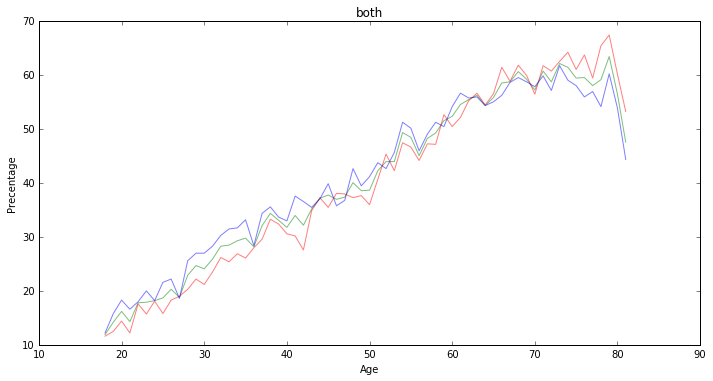

In [461]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
#vote_data_both_sex_details
vote_data_both_sex_details['Age']  = pd.Series(range(18,82), index=vote_data_both_sex_details.index)
y= vote_data_both_sex_details['Total Population Reported voted Percent']
x = vote_data_both_sex_details['Age'] 

ax1.plot(x,y,c='green', alpha = 0.5)
ax1.set_title('both') 
ax1.set_xlabel('Age')
ax1.legend = 'Both'
ax1.set_ylabel('Precentage')
    



ax2=  fig.add_subplot(2,1,1)
vote_data_male_details['Age']  = pd.Series(range(18,82), index=vote_data_male_details.index)
y= vote_data_male_details['Total Population Reported voted Percent']
x = vote_data_male_details['Age'] 
ax2.plot(x,y,c='red', alpha = 0.5)
ax2.legend = 'Males'

ax3=  fig.add_subplot(2,1,1)
vote_data_female_details['Age']  = pd.Series(range(18,82), index=vote_data_female_details.index)
y= vote_data_female_details['Total Population Reported voted Percent']
x = vote_data_female_details['Age'] 
ax3.plot(x,y,c='blue', alpha = 0.5)
ax3.legend = 'Female'


plt.tight_layout()
plt.show()




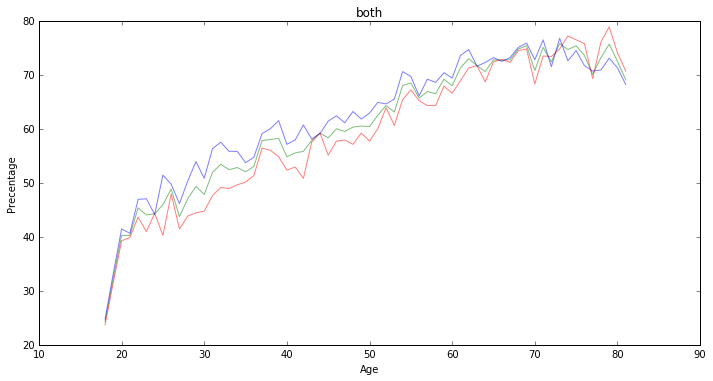

In [462]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
#vote_data_both_sex_details
vote_data_both_sex_details['Age']  = pd.Series(range(18,82), index=vote_data_both_sex_details.index)
y= vote_data_both_sex_details['Total Population Reported registered Percent']
x = vote_data_both_sex_details['Age'] 

ax1.plot(x,y,c='green', alpha = 0.5)
ax1.set_title('both') 
ax1.set_xlabel('Age')
ax1.legend = 'Both'
ax1.set_ylabel('Precentage')
    



ax2=  fig.add_subplot(2,1,1)
vote_data_male_details['Age']  = pd.Series(range(18,82), index=vote_data_male_details.index)
y= vote_data_male_details['Total Population Reported registered Percent']
x = vote_data_male_details['Age'] 
ax2.plot(x,y,c='red', alpha = 0.5)
ax2.legend = 'Males'

ax3=  fig.add_subplot(2,1,1)
vote_data_female_details['Age']  = pd.Series(range(18,82), index=vote_data_female_details.index)
y= vote_data_female_details['Total Population Reported registered Percent']
x = vote_data_female_details['Age'] 
ax3.plot(x,y,c='blue', alpha = 0.5)
ax3.legend = 'Female'


plt.tight_layout()
plt.show()


** Histogram of Reported registered Percent from the six sub dataset**

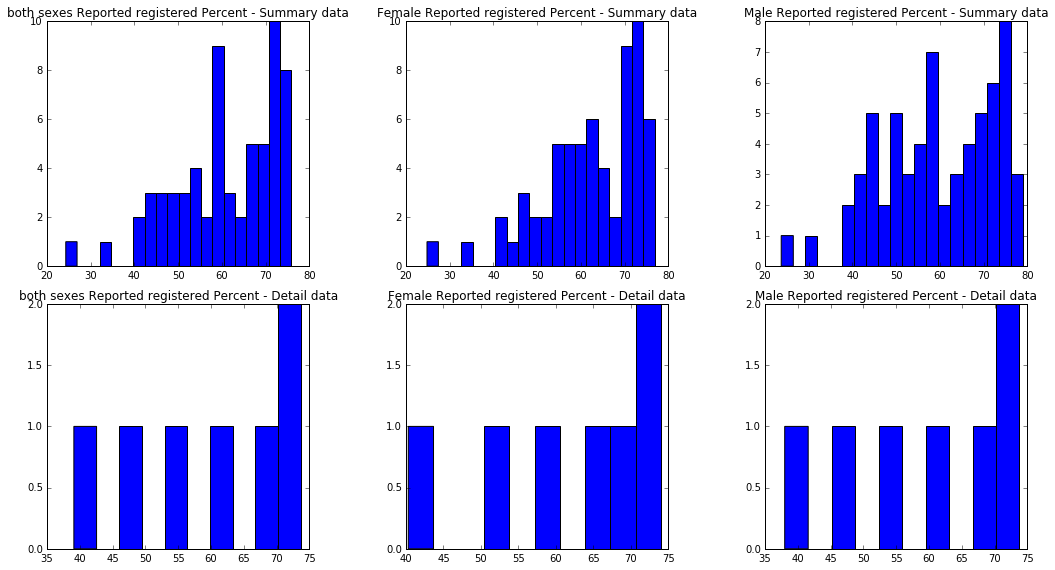

In [481]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax1.hist(vote_data_both_sex_details['Total Population Reported registered Percent'], bins = 20)
ax1.set_title('both sexes Reported registered Percent - Summary data') 

ax2.hist(vote_data_female_details['Total Population Reported registered Percent'], bins = 20)
ax2.set_title('Female Reported registered Percent - Summary data') 

ax3.hist(vote_data_male_details['Total Population Reported registered Percent'], bins = 20)
ax3.set_title('Male Reported registered Percent - Summary data') 

ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
ax4.hist(vote_data_both_sex_group['Total Population Reported registered Percent'], bins = 10)
ax4.set_title('both sexes Reported registered Percent - Detail data') 

ax5.hist(vote_data_female_group['Total Population Reported registered Percent'], bins = 10)
ax5.set_title('Female Reported registered Percent - Detail data') 

ax6.hist(vote_data_male_group['Total Population Reported registered Percent'], bins = 10)
ax6.set_title('Male Reported registered Percent - Detail data') 
    


plt.tight_layout()
plt.show()


** Fininding Summary **

1- there is storage corelation between  the three type (both age , male , and female) for both vote and report.

2- there is stroage corelation netween vote and report for all age subset * both age , male , female).

3- there is a linear relation between age and vote.

4- there is a linear relation between age and report.

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**

as I find that there is relation between age and vote precentage I would is if there is a causation between age and the abaility or the desire to register or vote ?

how stronge the relation between age and vote precentage ?

Is the relation is linear ?

** Additional data **

additional data  will  needed ,this data is to find if there is any confound variables that cuase this correlation between age and vote precentage . and to prove if the relation in linear  ,  we will need to calculate the coefficient if the linear relation and the confidence level of this relation 